# Pancard Tampering Detection

### Setting up

In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [4]:
# Open image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw) 

## Loading original and user provided images.

In [8]:
# file format of the source file
print(f"Original image format: {original.format}")
print(f"Tampered image format: {tampered.format}")

# Image size in pixels. The size is given as height and width
print(f"Original Image size: {original.size}")
print(f"Tampered Image size: {tampered.size}")

Original image format: JPEG
Tampered image format: PNG
Original Image size: (1200, 800)
Tampered Image size: (282, 179)


In [15]:
# Resizing image into same size
original=original.resize((280,170))
print(original.size)
original.save("pancardTamperingDetection/image/original.png")
tampered=tampered.resize((280,170))
print(tampered.size)
tampered.save("pancardTamperingDetection/image/tampered.png")

(280, 170)
(280, 170)


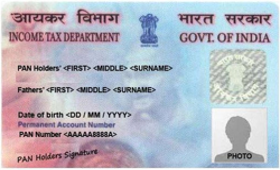

In [16]:
# Display original image
original

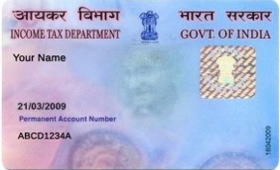

In [17]:
# Display tampered image
tampered

## User provided image which will be compared with PAN card.


In [18]:
# load input images
original=cv2.imread("pancardTamperingDetection/image/original.png")
tampered=cv2.imread("pancardTamperingDetection/image/tampered.png")

In [19]:
### Reading images using openCV
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [20]:
# Compute the Structural Similarity Index (SSIM) between the two images
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff*255).astype("uint8")
print(f"SSIM: {format(score)}")

SSIM: 0.34060237275498295


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [21]:
# Calculate threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [22]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


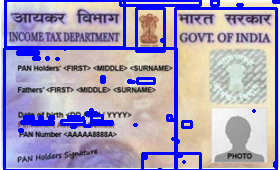

In [23]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


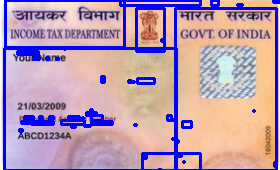

In [24]:
#Diplay tampered image with contour
print('Tampered Image')
Image.fromarray(tampered)

Different Image


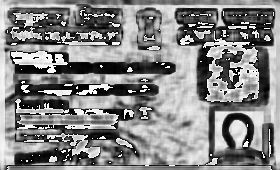

In [25]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


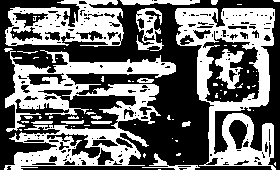

In [26]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)